# Table of Contents
#### 01. Import Libraries and Data
#### 02. Merging data frames
#### 03. Data Cleaning
    - Exploring categorical columns
    - Exploring numerical columns
#### 04. Exporting Data


## 01. Import Libraries and Data

In [82]:
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy 

In [2]:
# Set path
path = r'C:\Users\Goce\Desktop\11-2023 World Happiness Report 2015-2023'

In [3]:
# Importing Data
df_2015 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2015.csv'), index_col = False)
df_2016 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2016.csv'), index_col = False)
df_2017 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2017.csv'), index_col = False)
df_2018 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2018.csv'), index_col = False)
df_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2019.csv'), index_col = False)
df_2020 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2020.csv'), index_col = False)
df_2021 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2021.csv'), index_col = False)
df_2022 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2022.csv'), index_col = False)
df_2023 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2023.csv'), index_col = False)

## 02. Merging data frames 
After checking the data frames, realized that they have the same columns so we can merge them into one data frame

In [10]:
# Create a list of DataFrames
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]


In [11]:
# Add a "year" column to each dataframe
years = range(2015, 2024)
for year, df in zip(years, dfs):
    df['year'] = year

In [12]:
# Concatenate the dataframes into one
whr_df = pd.concat(dfs, ignore_index=True)

In [13]:
#checking the df
whr_df.head(3)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015


In [14]:
#checking the df
whr_df.shape



(1367, 10)

In [15]:
#checking the df
whr_df.tail(3)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1364,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051,2023
1365,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027,2023
1366,Afghanistan,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059,2023


#### Columns and meaning:
- country -	name of the country
- region - 	The geographic region to which the country belongs
- happiness_score-	The score representing the overall happiness or well-being
- gdp_per_capita-	The extent to which GDP contributes to the calculation of the Happiness Score.
- social_support-	The extent to which measure of social support contributes to the calculation of the Happiness Score.
- healthy_life_expectancy-	The extent to which Life expectancy contributed to the calculation of the Happiness Score
- freedom_to_make_life_choices-	The extent to which Freedom contributed to the calculation of the Happiness Score.
- generosity-	The extent to which generosity or charitable behavior contributes to the calculation of the Happiness Score.
- perceptions_of_corruption-	The extent to which Perception of Corruption contributes to Happiness Score.
- year-	year (2015-2023)


In [23]:
#Exporting whr_df
whr_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'whr_df_uncleaned.csv'))

## 03. Data Cleaning 

In [21]:
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


### Exploring categorical columns

In [27]:
pd.set_option('display.max_rows', None)

In [29]:
#how many entries we have for each country; we expect value 9, since we have data for 9 years
#shown in descending order (highest value first)
whr_df["country"].value_counts().sort_values(ascending = False).head(200)

Cyprus                       11
Ethiopia                      9
Costa Rica                    9
Venezuela                     9
Singapore                     9
Panama                        9
Germany                       9
Israel                        9
Chile                         9
Guatemala                     9
Australia                     9
Switzerland                   9
Kosovo                        9
New Zealand                   9
Sweden                        9
Netherlands                   9
Uruguay                       9
Colombia                      9
Thailand                      9
Saudi Arabia                  9
Spain                         9
Malta                         9
Taiwan Province of China      9
Finland                       9
Canada                        9
France                        9
El Salvador                   9
Romania                       9
Hong Kong S.A.R. of China     9
Liberia                       9
India                         9
United K

#### addressing some inconsistencies in column "country"

In [31]:
# Replace the values in the "country" column
whr_df["country"].replace({"Turkey": "Turkiye", "Czech Republic": "Czechia", "Palestinian Territories": "State of Palestine"}, inplace=True)

In [32]:
# Replace the values for Cyprus in 2018 and 2019
whr_df.loc[(whr_df["country"] == "Cyprus") & (whr_df["happiness_score"] == 5.835) & (whr_df["year"] == 2018), "country"] = "North Cyprus"
whr_df.loc[(whr_df["country"] == "Cyprus") & (whr_df["happiness_score"] == 5.718) & (whr_df["year"] == 2019), "country"] = "North Cyprus"

In [33]:
# Replace the value Somaliland in the "country" column
whr_df["country"] = whr_df["country"].replace("Somaliland region", "Somaliland Region")

In [39]:
#how many entries we have for each country; we addressed some of the issues, for those country who have less than 9 entries the data for some years is missing.
#shown in descending order (highest value first)
whr_df["country"].value_counts().sort_values(ascending = False).head(200)

Switzerland                  9
Venezuela                    9
Panama                       9
Germany                      9
New Zealand                  9
Chile                        9
Sweden                       9
France                       9
Argentina                    9
Czechia                      9
Kosovo                       9
Netherlands                  9
Finland                      9
Uruguay                      9
Colombia                     9
Hungary                      9
Saudi Arabia                 9
Spain                        9
Malta                        9
Taiwan Province of China     9
Belgium                      9
Canada                       9
Austria                      9
El Salvador                  9
Guatemala                    9
Uzbekistan                   9
Japan                        9
Mexico                       9
China                        9
Hong Kong S.A.R. of China    9
Liberia                      9
Singapore                    9
Australi

#### addressing some inconsistencies in column "region"

In [30]:
#how many entries we have for each region
whr_df['region'].value_counts()

Sub-Saharan Africa                    337
Central and Eastern Europe            214
Latin America and Caribbean           190
Western Europe                        188
Middle East and North Africa          161
Southeast Asia                         80
South Asia                             61
East Asia                              54
Commonwealth of Independent States     44
North America and ANZ                  36
Africa                                  2
Name: region, dtype: int64

In [40]:
# filter the DataFrame for the "Africa" region
africa_df = whr_df[whr_df['region'] == 'Africa']

In [41]:
africa_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
90,Somaliland Region,Africa,5.057,0.18847,0.95152,0.43873,0.46582,0.50318,0.39928,2015
254,Somaliland Region,Africa,5.057,0.25558,0.75862,0.33108,0.39130,0.51479,0.36794,2016


In [42]:
# Replace the values for Africa into Sub-Saharan Africa  in the "region" column
whr_df["region"] = whr_df["region"].replace("Africa", "Sub-Saharan Africa")

In [44]:
#how many entries we have for each region
whr_df['region'].value_counts()

Sub-Saharan Africa                    339
Central and Eastern Europe            214
Latin America and Caribbean           190
Western Europe                        188
Middle East and North Africa          161
Southeast Asia                         80
South Asia                             61
East Asia                              54
Commonwealth of Independent States     44
North America and ANZ                  36
Name: region, dtype: int64

#### Visualisation for categorical features

<AxesSubplot:title={'center':'Absolute frequency distribution of regions'}>

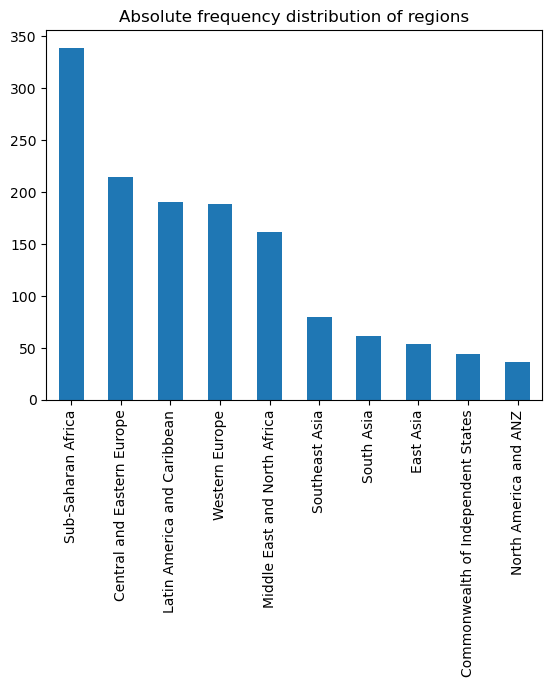

In [79]:
whr_df['region'].value_counts().plot(kind='bar', title='Absolute frequency distribution of regions')

### Exploring numerical columns

In [19]:
whr_df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


#### Based on the 0 min value for several columns, checking how many entries are affected. However, since the values for happiness score are available i will leave these entries as are. 

In [67]:
# Locate rows with 0 values in the "gdp_per_capita" column
zero_gdp_rows = whr_df[whr_df['gdp_per_capita'] == 0]

# Count the number of rows with 0 values
num_zero_gdp_rows = len(zero_gdp_rows)

# Display the number of rows with 0 values
print("Number of rows with 0 values in 'gdp_per_capita':", num_zero_gdp_rows)

Number of rows with 0 values in 'gdp_per_capita': 9


In [68]:
# Locate rows with 0 values in the "social_support" column
zero_social_support_rows = whr_df[whr_df['social_support'] == 0]

# Count the number of rows with 0 values
num_zero_social_support_rows = len(zero_social_support_rows)

# Display the number of rows with 0 values
print("Number of rows with 0 values in 'social_support':", num_zero_social_support_rows)

Number of rows with 0 values in 'social_support': 9


In [69]:
# Locate rows with 0 values in the "healthy_life_expectancy" column
zero_health_expectancy_rows = whr_df[whr_df['healthy_life_expectancy'] == 0]

# Count the number of rows with 0 values
num_zero_health_expectancy_rows = len(zero_health_expectancy_rows)

# Display the number of rows with 0 values
print("Number of rows with 0 values in 'healthy_life_expectancy':", num_zero_health_expectancy_rows)


Number of rows with 0 values in 'healthy_life_expectancy': 9


In [70]:
# Locate rows with 0 values in the "freedom_to_make_life_choices" column
zero_freedom_rows = whr_df[whr_df['freedom_to_make_life_choices'] == 0]

# Count the number of rows with 0 values
num_zero_freedom_rows = len(zero_freedom_rows)

# Display the number of rows with 0 values
print("Number of rows with 0 values in 'freedom_to_make_life_choices':", num_zero_freedom_rows)


Number of rows with 0 values in 'freedom_to_make_life_choices': 9


In [71]:
# Locate rows with 0 values in the "generosity" column
zero_generosity_rows = whr_df[whr_df['generosity'] == 0]

# Count the number of rows with 0 values
num_zero_generosity_rows = len(zero_generosity_rows)

# Display the number of rows with 0 values
print("Number of rows with 0 values in 'generosity':", num_zero_generosity_rows)



Number of rows with 0 values in 'generosity': 9


In [72]:
# Locate rows with 0 values in the "perceptions_of_corruption" column
zero_corruption_rows = whr_df[whr_df['perceptions_of_corruption'] == 0]

# Count the number of rows with 0 values
num_zero_corruption_rows = len(zero_corruption_rows)

# Display the number of rows with 0 values
print("Number of rows with 0 values in 'perceptions_of_corruption':", num_zero_corruption_rows)


Number of rows with 0 values in 'perceptions_of_corruption': 10


In [47]:
#checking if whr_df contains mixed type columns
for col in whr_df.columns.tolist():
  weird = (whr_df[[col]].applymap(type) != whr_df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (whr_df[weird]) > 0:
    print (col) # no mixed type columns

In [48]:
whr_df.isnull().sum() # finding missing values

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [49]:
df_nan = whr_df[whr_df['healthy_life_expectancy']. isnull()== True] # to see these values

In [50]:
df_nan

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1328,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023


In [51]:
df_nan1 = whr_df[whr_df['perceptions_of_corruption']. isnull()== True] # to see these values

In [52]:
df_nan1

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
489,United Arab Emirates,Middle East and North Africa,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [53]:
# Filling NA in column 'perceptions_of_corruption' with AVG value for 'United Arab Emirates' during all years.

whr_df['perceptions_of_corruption'] = whr_df.groupby('country')['perceptions_of_corruption'].transform(lambda x: x.fillna(x.mean()))

In [54]:
#same for State of Palestine for the column healthy_life_expectancy
whr_df['healthy_life_expectancy'] = whr_df.groupby('country')['healthy_life_expectancy'].transform(lambda x: x.fillna(x.mean()))

In [55]:
#checking 
whr_df.isnull().sum() # finding missing values

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

In [56]:
#checking the value 
uae_2018 = whr_df[(whr_df['country'] == 'United Arab Emirates') & (whr_df['year'] == 2018)]
print(uae_2018)

                  country                        region  happiness_score  \
489  United Arab Emirates  Middle East and North Africa            6.774   

     gdp_per_capita  social_support  healthy_life_expectancy  \
489           2.096           0.776                     0.67   

     freedom_to_make_life_choices  generosity  perceptions_of_corruption  year  
489                         0.284       0.186                   0.273518  2018  


In [59]:
#checking the value 
state_of_palestine_2023 = whr_df[(whr_df['country'] == 'State of Palestine') & (whr_df['year'] == 2023)]
print(state_of_palestine_2023)

                 country                        region  happiness_score  \
1328  State of Palestine  Middle East and North Africa            4.908   

      gdp_per_capita  social_support  healthy_life_expectancy  \
1328           1.144           1.309                 0.579635   

      freedom_to_make_life_choices  generosity  perceptions_of_corruption  \
1328                         0.416       0.065                      0.067   

      year  
1328  2023  


In [61]:
#Finding Duplicates
df_dups = whr_df[whr_df.duplicated()] # no duplicates found

In [63]:
#set the precision to 2 decimal places
pd.set_option("display.precision", 2)

In [64]:
whr_df.head(3)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.59,1.40,1.35,0.94,0.67,0.30,0.42,2015
1,Iceland,Western Europe,7.56,1.30,1.40,0.95,0.63,0.44,0.14,2015
2,Denmark,Western Europe,7.53,1.33,1.36,0.87,0.65,0.34,0.48,2015


In [65]:
whr_df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
dtype: object

In [73]:
# Use IQR to find the outlier
df_n = whr_df.iloc[:, 2:]

def detect_outliers_iqr(column, threshold=1.5):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers = df_n.apply(detect_outliers_iqr)

print(outliers.sum())

happiness_score                   1
gdp_per_capita                    0
social_support                   14
healthy_life_expectancy           0
freedom_to_make_life_choices     17
generosity                       50
perceptions_of_corruption       110
year                              0
dtype: int64


In [78]:
# Filter the DataFrame to show only the specified columns
outliers_filtered = whr_df.loc[outliers['perceptions_of_corruption'], ['country', 'year', 'perceptions_of_corruption']]

# Display the resulting DataFrame
print(outliers_filtered)

                        country  year  perceptions_of_corruption
0                   Switzerland  2015                       0.42
2                       Denmark  2015                       0.48
3                        Norway  2015                       0.37
5                       Finland  2015                       0.41
7                        Sweden  2015                       0.44
8                   New Zealand  2015                       0.43
9                     Australia  2015                       0.36
16                   Luxembourg  2015                       0.38
19         United Arab Emirates  2015                       0.39
23                    Singapore  2015                       0.49
27                        Qatar  2015                       0.52
71    Hong Kong S.A.R. of China  2015                       0.37
90            Somaliland Region  2015                       0.40
129                     Georgia  2015                       0.38
153                      

The presence of a relatively high number of outliers in the "perceptions_of_corruption" column (110 outliers) indicates that the majority of values are concentrated on the lower end of the scale (unfortunately). Outliers, actually are countries with the lowest levels of perceived corruption (where more of the happines come from lower corruption)

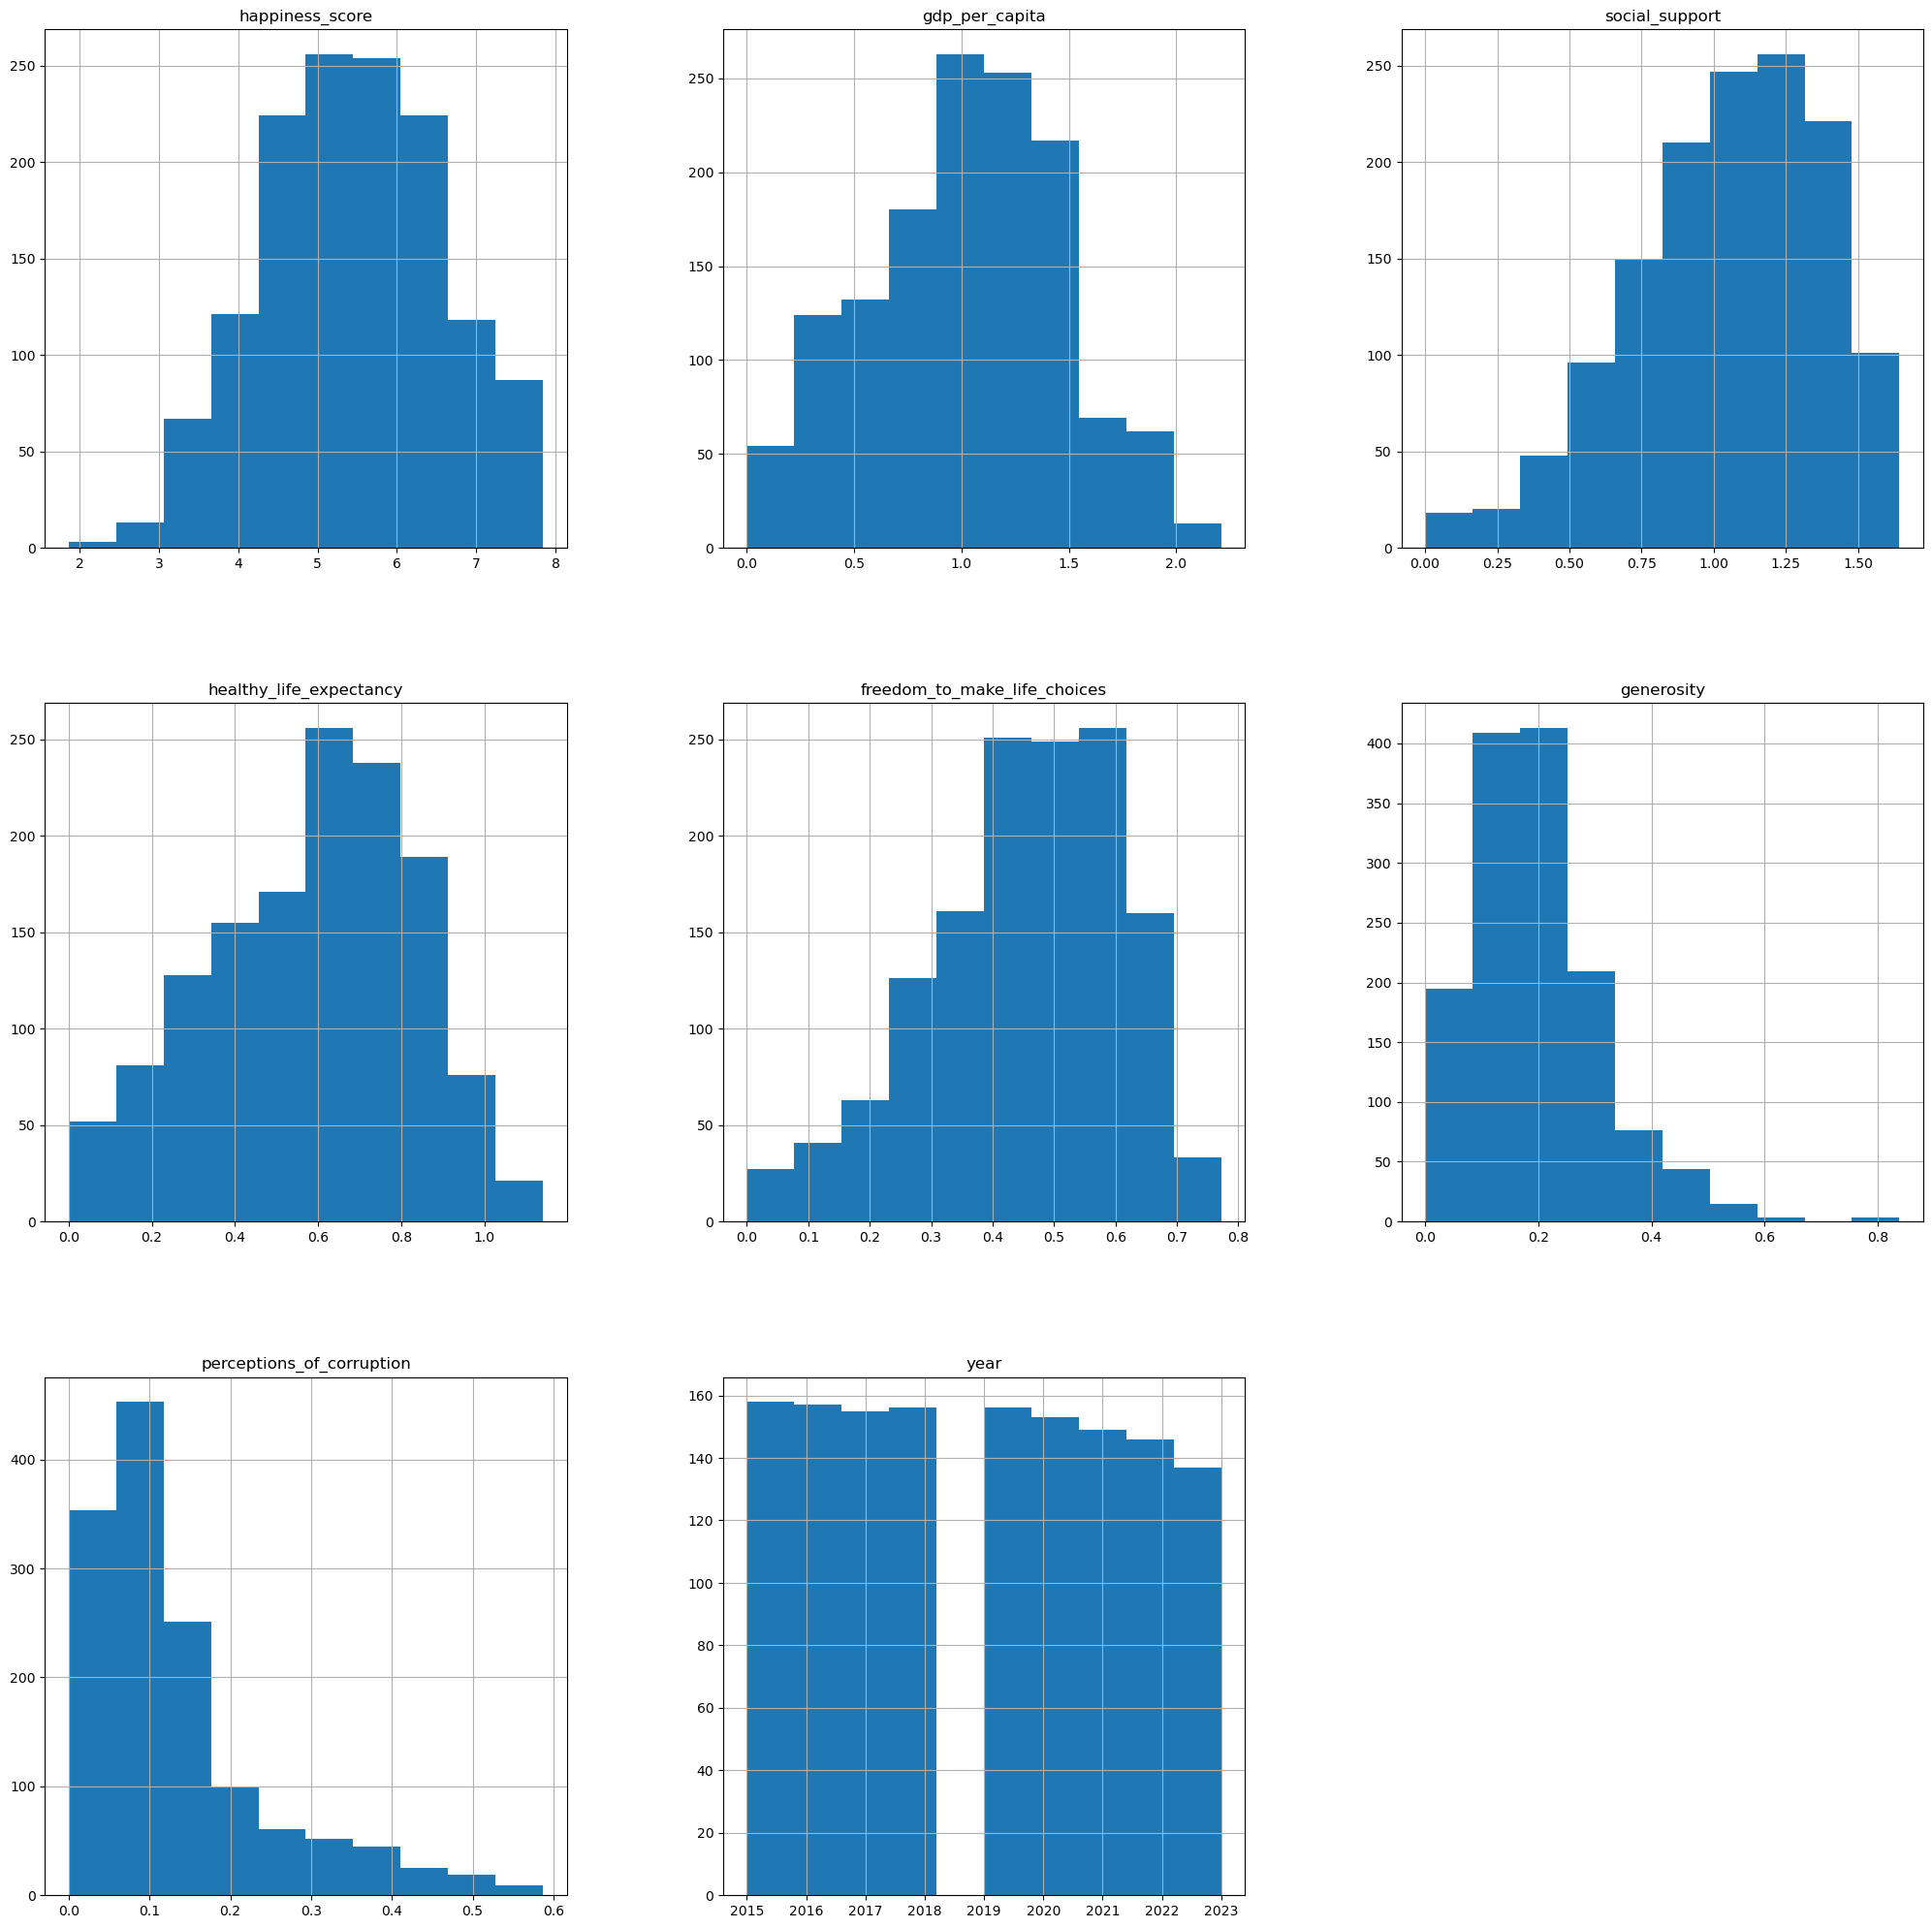

In [83]:
whr_df.hist(figsize = (25,25))
plt.show()

### 04. Exporting Data

In [80]:
#Exporting whr_df
whr_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'whr_df_cleaned.csv'))